**Table of contents**<a id='toc0_'></a>    
- [Define read and save path and load data](#toc1_)    
- [Set configs](#toc2_)    
- [How to handle big chunk missing data](#toc3_)    
  - [Select time span first and then impute data](#toc3_1_)    
  - [Impute data first then select time span](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import random
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.colors import to_hex
from importlib import reload

import sys
if Path('/content/drive/MyDrive').exists():
  sys.path.append('/content/drive/MyDrive/Colab Notebooks/custom_modules')
else:
  sys.path.append('../custom_modules')
import TSClustering
reload(TSClustering)
from TSClustering import TSClustering

# <a id='toc1_'></a>[Define read and save path and load data](#toc0_)

In [2]:
local_path = Path('../../data_preprocessed')
drive_path = Path('/content/drive/MyDrive/ProcessedData_Melbourne_Footfalls')

base_path = local_path if local_path.exists() else drive_path

save_dir = Path('../../Results_test1') if local_path.exists() else Path('/content/drive/MyDrive/Results_Melbourne_Footfalls')
if save_dir.exists() == False:
  save_dir.mkdir(parents=True, exist_ok=True)

read_processed_dir = base_path / '1. merged_peds_data_hist_curr'
read_raw_dir = Path('./Data (20230918)') if local_path.exists() else Path('/content/drive/MyDrive/Data/Melbourne_Footfalls')

In [3]:
data = pd.read_csv(read_processed_dir / 'footfall_merged.csv') # the data should be unpivoted
data.rename(columns={'New_Sensor_Name': 'Sensor_Name'}, inplace=True)

# <a id='toc2_'></a>[Set configs](#toc0_)

In [4]:
model_configs = {
  "metric": 'dtw',
  "random_state": 42
}

configs = {
  "data": data.copy(),
  "target_column": 'Sensor_Name', # target (sensor name)
  "time_column": 'Date_Time', # feature names (timestamp)
  "value_column": 'Hourly_Counts', # value
  "sensor_locations": data[['Sensor_Name', 'Latitude', 'Longitude', 'Location']],
  "save_dir": save_dir,
  "algorithm": 'kmeans',
  "scale": 'week', 
  "order_of_impute_agg_norm": "impute_agg_norm", 
  "time_span": 2019, 
  "feature_extraction": None, 
  "dim_reduction": "PCA", 
  "normalise": "meanvariance", 
  # "model_configs": model_configs, 
  "seed": 42,
  "verbose": False
}

In [5]:
pipeline = TSClustering(**configs)

the model's configs are set as default values.


In [6]:
data = data.pivot(index=configs["target_column"], columns=configs["time_column"], values=configs["value_column"])
data.columns = pd.to_datetime(data.columns)

# <a id='toc3_'></a>[How to handle big chunk missing data](#toc0_)

## <a id='toc3_1_'></a>[Select time span first and then impute data](#toc0_)

../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA created.
--------------------------------------------------
the data shape before cutting is (80, 121501)
select data in 2019
the data shape after cutting is (53, 8760)
the data range: 2019-01-01 00:00:00 - 2019-12-31 23:00:00
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA created.
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/data.csv will be saved.
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/data.csv saved.
plot the plot_raw_data .....
(53, 8760)
7 8
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/plot_raw_data_2019_2019_raw_with_shade.png updated.
../../Results_test1/euclidean_kmeans_norm-meanvariance_sca

/Users/alysia/Research - Melbourne Footfalls/Python scripts/basic_analysis/../custom_modules/modelling_funs.py:186: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The best method is: {results_df.iloc[0][0]} with an average R2 score of {results_df.iloc[0][1]:.2f} and an average MAE score of {results_df.iloc[0][2]:.2f}")
/Users/alysia/Research - Melbourne Footfalls/Python scripts/basic_analysis/../custom_modules/modelling_funs.py:187: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(results_df.iloc[0][1]):


../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/data_missing_value_filled.csv saved.
The size of data after imputation is (53, 8760)
plot the plot_imputed_data .....
(53, 8760)
7 8
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/plot_imputed_data_2019_2019_raw_with_shade.png updated.
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA exists and will not be updated.
--------------------------------------------------
the data size before aggregation is (53, 8760)
the data will be aggregated by week
the aggregated data size is (53, 53)
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA created.
../../Results_test1/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/aggregated_data.xlsx will be 

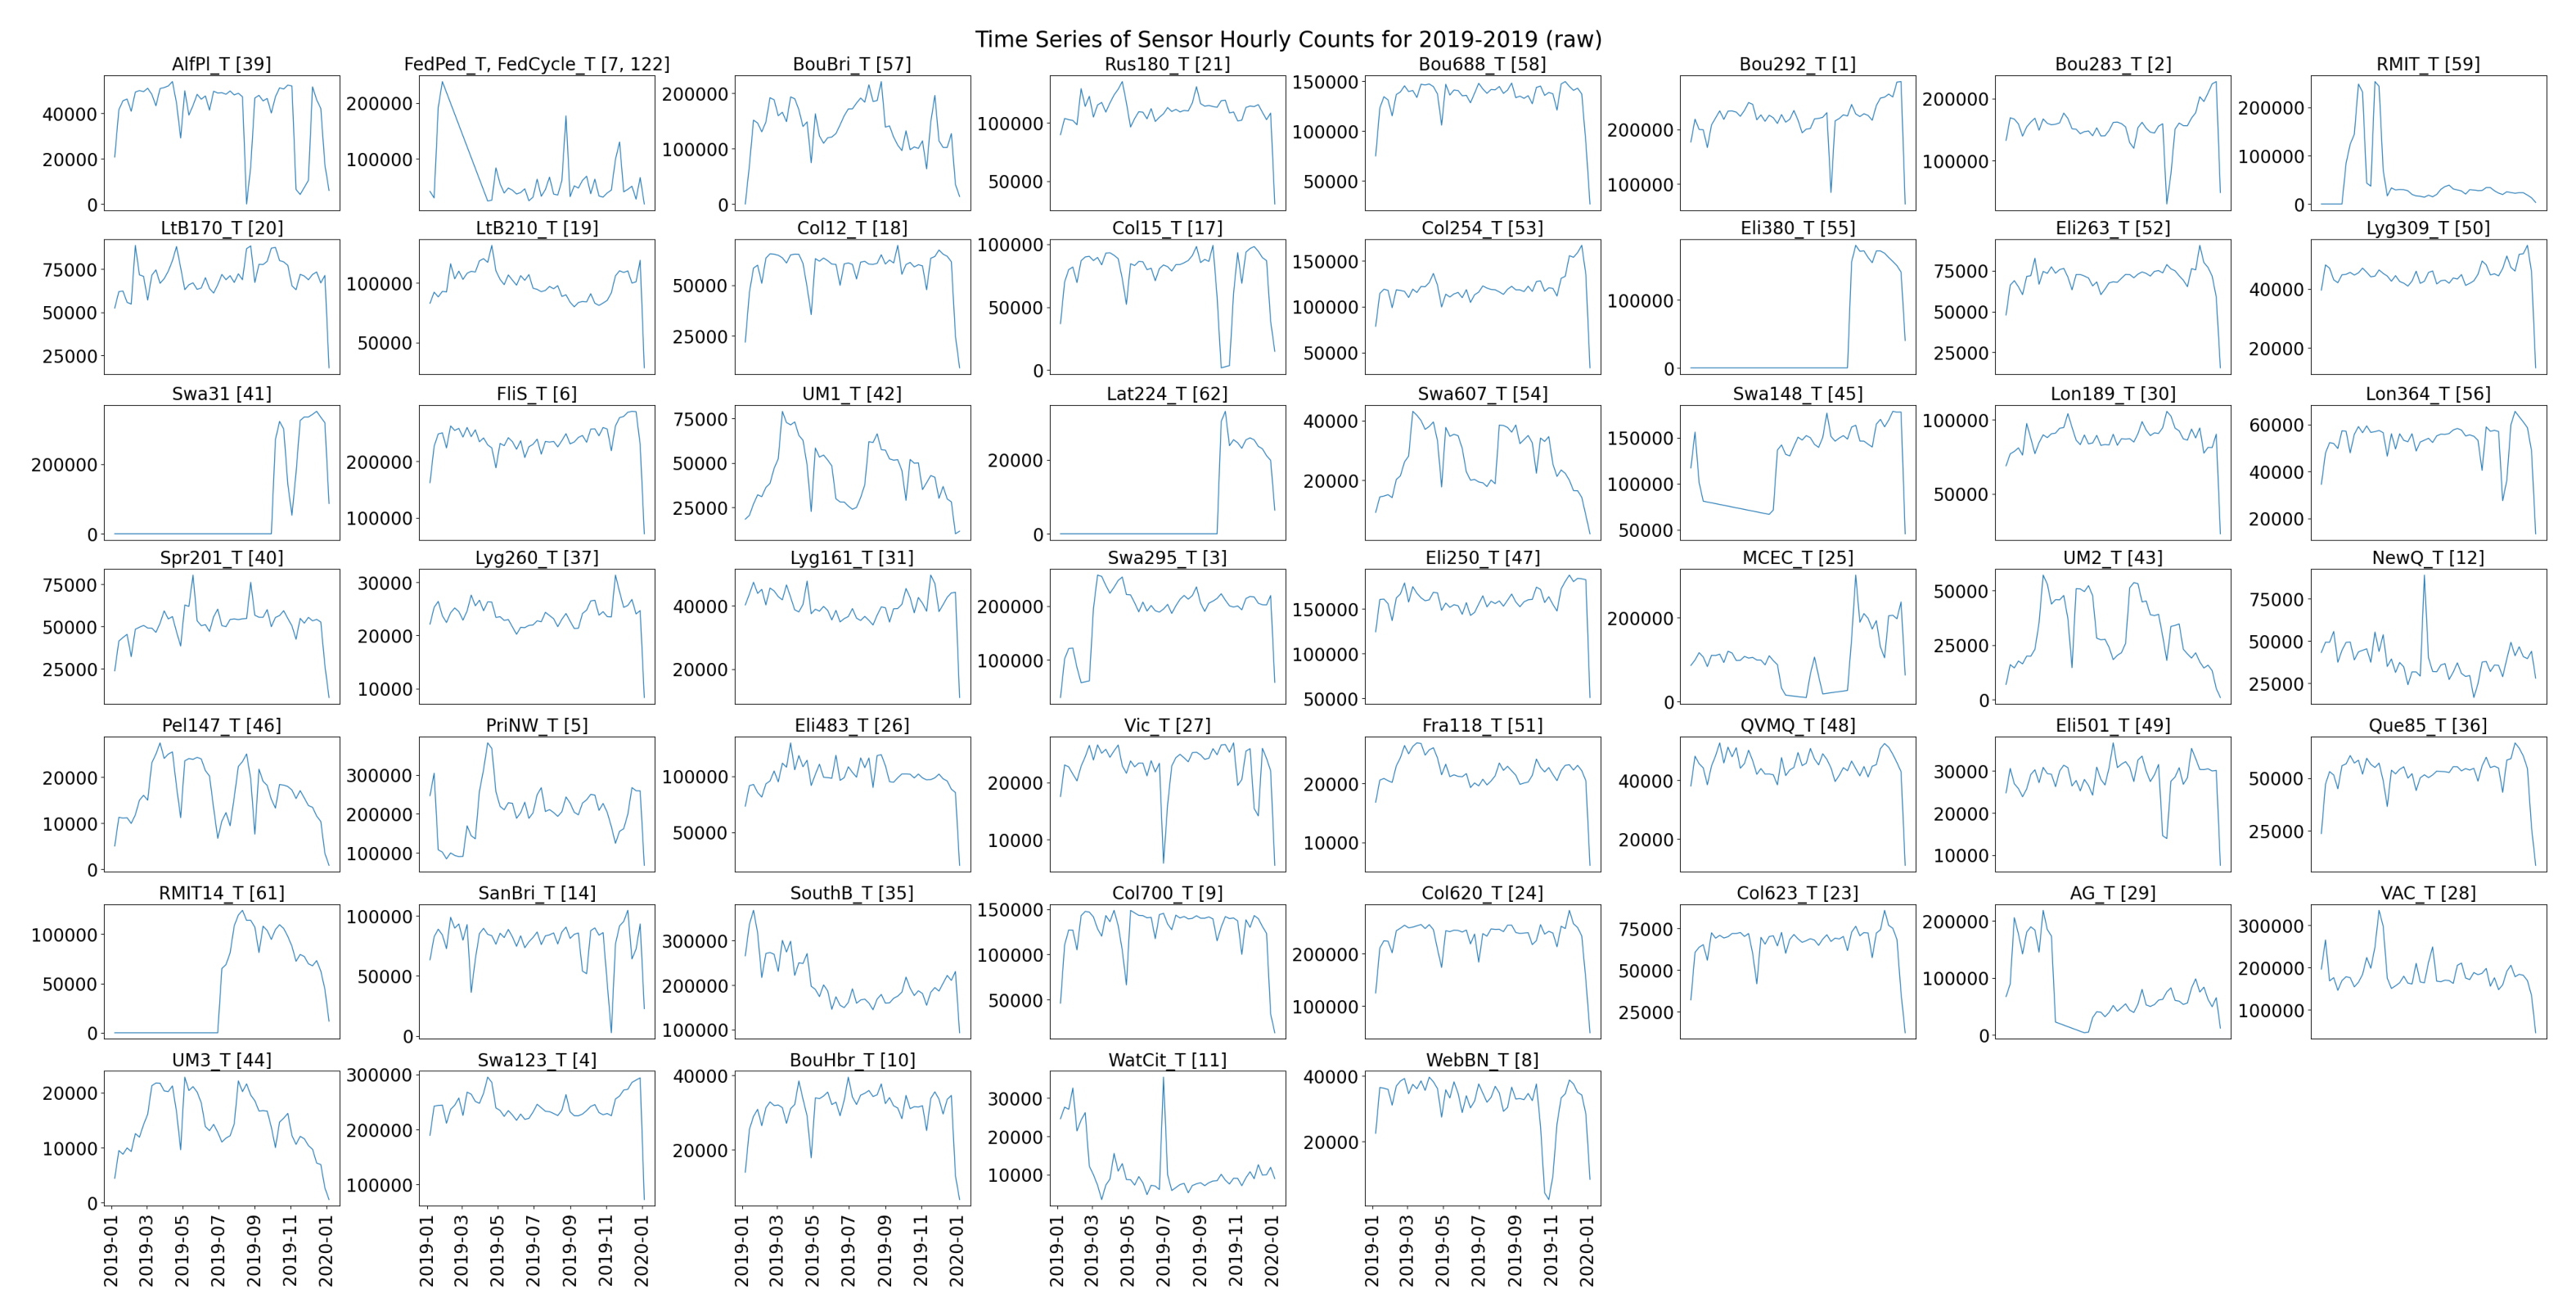

In [7]:
pipeline.set_save_dir(Path('../../Results_test1')) # set save dir
data19 = pipeline.select_time_span(data)
pipeline.plot_data(data=data19, fig_name='plot_raw_data')
data19_imputed = pipeline.impute_data(data19)
pipeline.plot_data(fig_name='plot_imputed_data')
data19_agg = pipeline.aggregation(data19_imputed)
pipeline.plot_data(fig_name='plot_aggregated_data')
# pipeline.load_image(file_name='plot_imputed_data_2019_2019_raw_with_shade.png')
pipeline.load_image(file_name='plot_aggregated_data_2019_2019_raw_with_shade.png')

## <a id='toc3_2_'></a>[Impute data first then select time span](#toc0_)

../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA created.
--------------------------------------------------
impute the missing values.....
the size of data before imputation: (80, 121501)
number of missing values in data: 5341271
find optimal interpolation methods and fill the missing data with size (80, 121501)......
compute average missing rates...
../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA created.
../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/missing_rate_per_sensor.xlsx will be saved.
../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/missing_rate_per_sensor.xlsx saved.
average missing value rate for rows with missing values: 0.5495089546588094
find sensors have full data...
sensors and corresponding years with no mis

/Users/alysia/Research - Melbourne Footfalls/Python scripts/basic_analysis/../custom_modules/modelling_funs.py:186: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The best method is: {results_df.iloc[0][0]} with an average R2 score of {results_df.iloc[0][1]:.2f} and an average MAE score of {results_df.iloc[0][2]:.2f}")
/Users/alysia/Research - Melbourne Footfalls/Python scripts/basic_analysis/../custom_modules/modelling_funs.py:187: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(results_df.iloc[0][1]):


number of missing values before interpolation: 5341271
number of missing values after interpolation with best methods: 5112676
number of missing values after interpolation with 0: 0
../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA created.
../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/data_missing_value_filled.csv will be saved.
../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA/data_missing_value_filled.csv saved.
The size of data after imputation is (80, 121501)
--------------------------------------------------
the data shape before cutting is (80, 121501)
select data in 2019
the data shape after cutting is (80, 8760)
the data range: 2019-01-01 00:00:00 - 2019-12-31 23:00:00
../../Results_test2/euclidean_kmeans_norm-meanvariance_scale-week_span-2019/order-impute_agg_norm_fea-None_dr-PCA cre

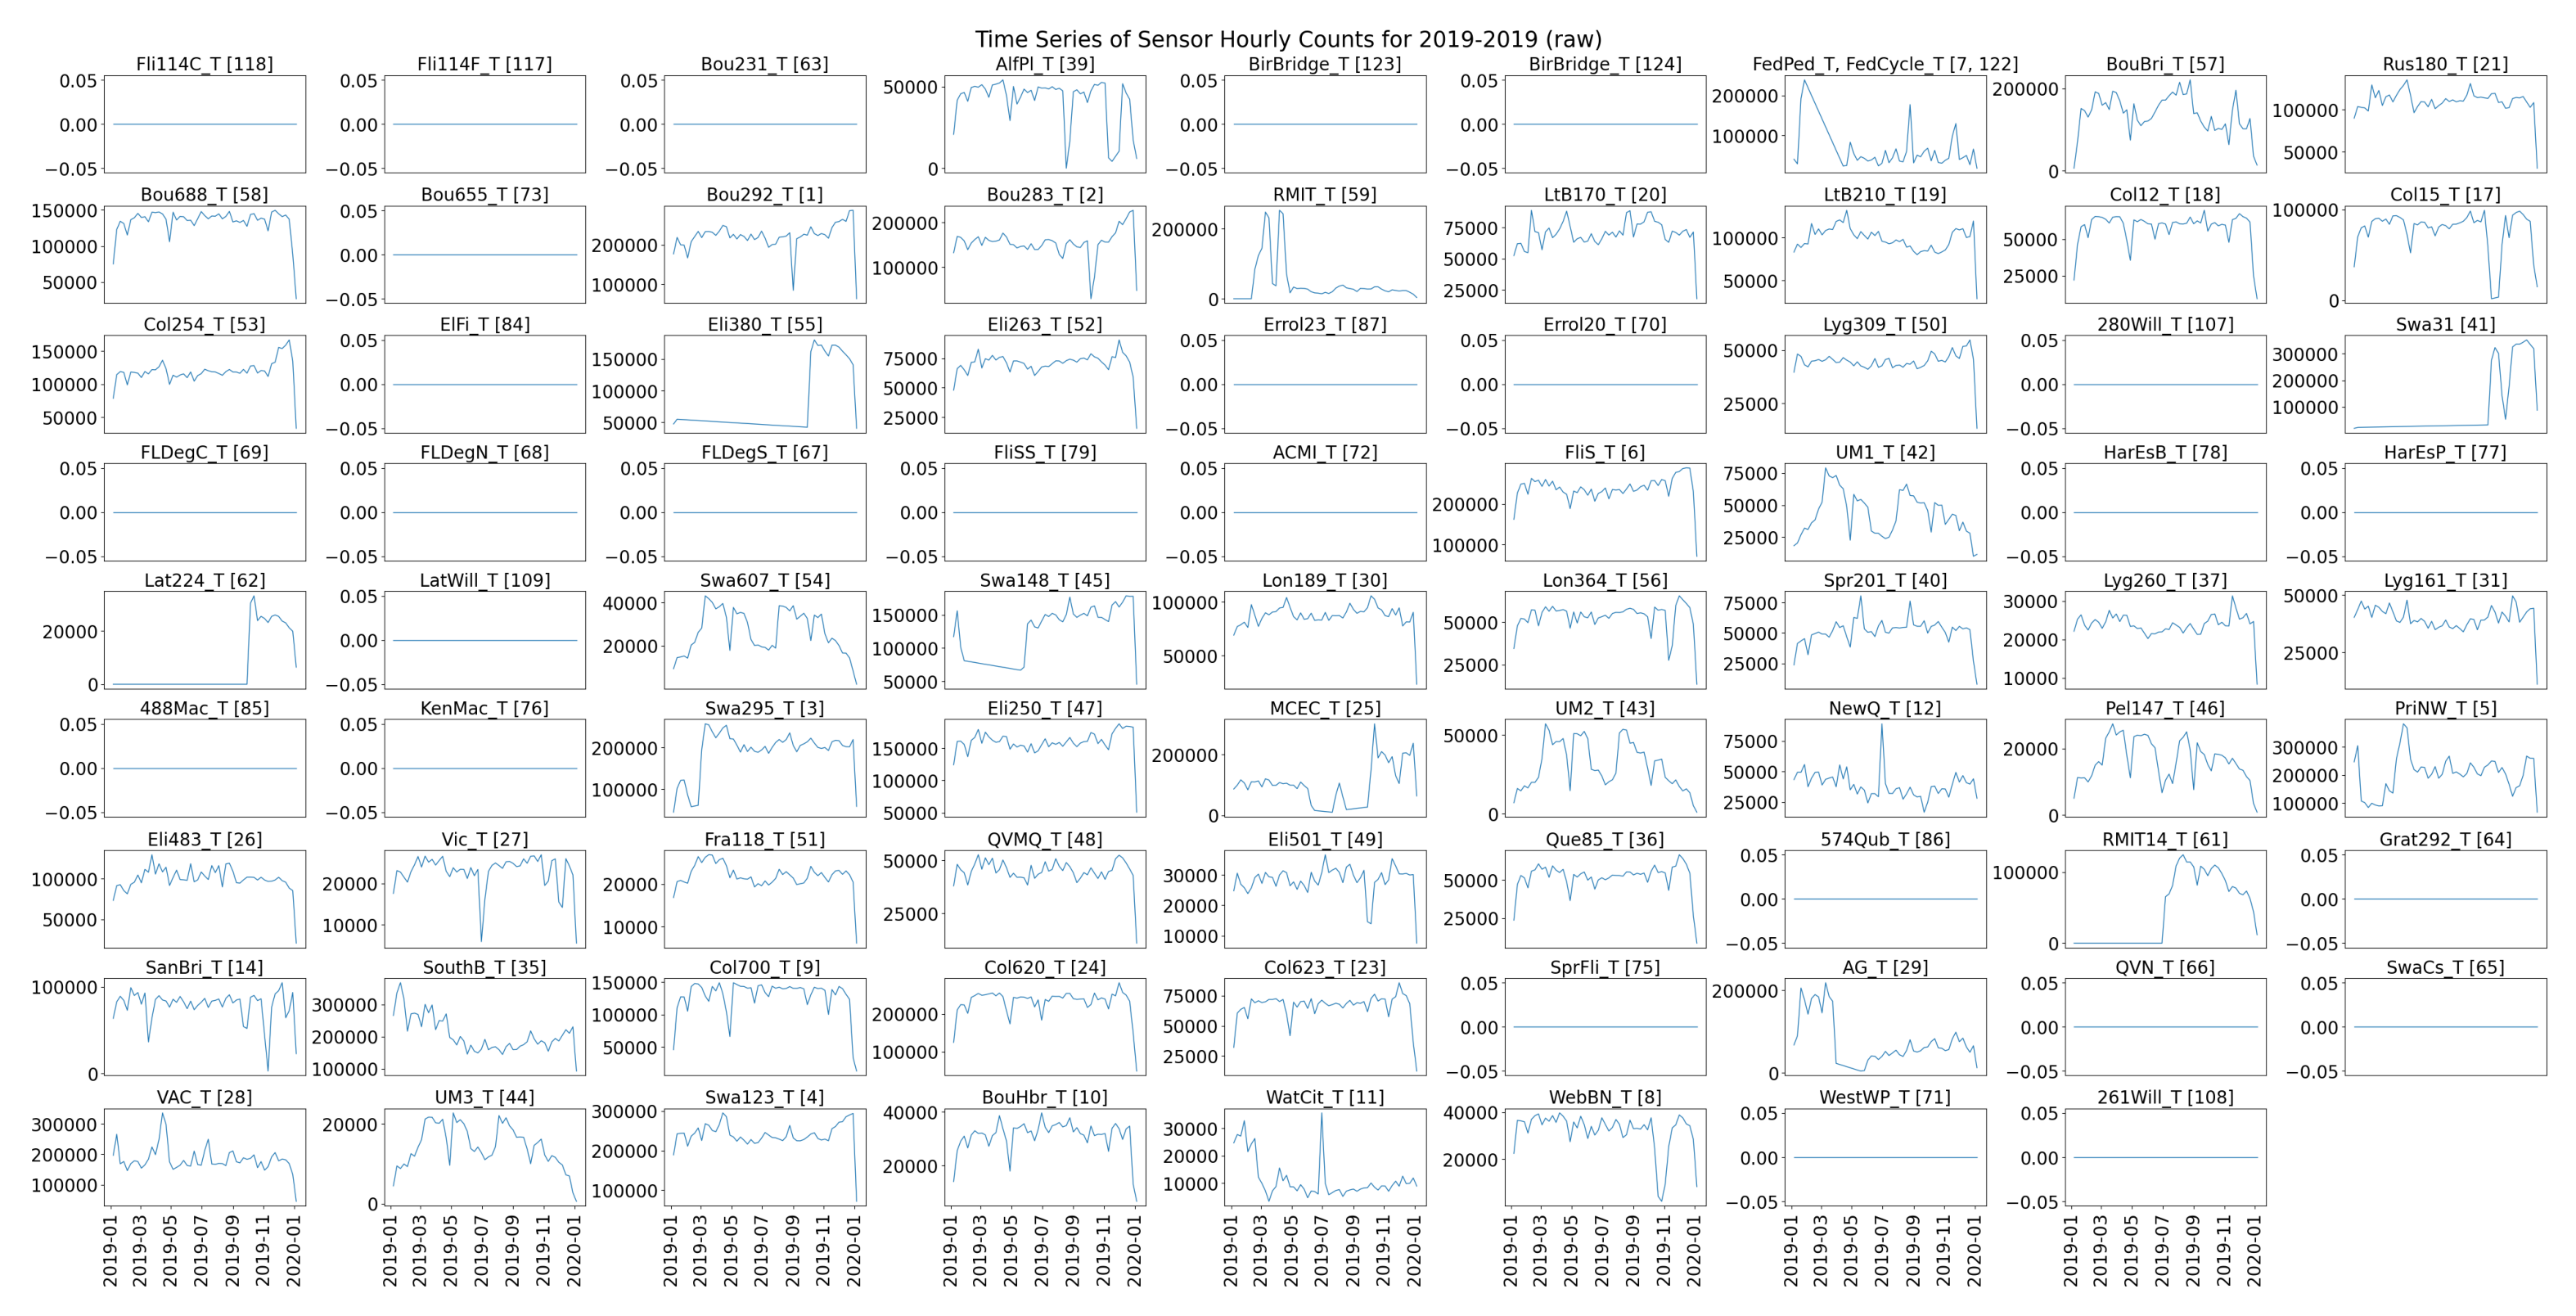

In [8]:
pipeline.set_save_dir(Path('../../Results_test2')) # set save dir
data19_imputed = pipeline.impute_data(data)
data19 = pipeline.select_time_span(data19_imputed)
pipeline.plot_data(data=data19, fig_name='plot_imputed_data')
data19_agg = pipeline.aggregation(data19)
pipeline.plot_data(fig_name='plot_aggregated_data')
# pipeline.load_image(file_name='plot_imputed_data_2019_2019_raw_with_shade.png')
pipeline.load_image(file_name='plot_aggregated_data_2019_2019_raw_with_shade.png')